In [55]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pylab import figure
from sklearn.manifold import TSNE
boston = load_boston()

c:\Users\Jasper\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include 

In [56]:
df = pd.read_csv('out.csv')
df

,Unnamed: 0,naam,datum,ondertekenaars,VVD,D66,PVV,CDA,PvdA,SP,...,"Vestering, L.","Akerboom, E.S.","Bushoff, T.J.","Dekker, R.J.","Grevink, M.","Kuik, A.","Pouw-Verweij, N.J.F.","Ploumen, E.M.J. (Lilianne)","Wijngaarden van, J.","Richardson, S.M."
0,0,Motie van het lid Van Raan c.s. over een gespr...,2022-03-30,"Lammert van Raan, Medeindiener Laurens Dassen...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Motie van de leden Stoffer en Omtzigt over ond...,2022-11-09,"Chris Stoffer, Pieter Omtzigt",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Motie van het lid Maatoug c.s. over de uitwerk...,2022-09-29,"Senna Maatoug, Medeindiener Barbara Kathmann,...",1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Motie van het lid Eerdmans over samen met de b...,2022-11-10,Joost Eerdmans,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Motie van de leden Grinwis en Van Weyenberg ov...,2022-03-30,"Pieter Grinwis, Steven van Weyenberg",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,Motie van de leden Kwint en Van der Molen over...,2022-11-24,"Peter Kwint, Harry van der Molen",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,4996,Motie van de leden Thijssen en Klaver over zo ...,2022-11-03,"Joris Thijssen, Medeindiener Jesse Klaver",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,4997,Motie van het lid Grinwis c.s. over de provinc...,2022-06-23,"Pieter Grinwis, Thom van Campen, Derk Boswijk",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,4998,Motie van het lid Alkaya over de vliegbelastin...,2022-05-10,Mahir Alkaya,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
keep_columns = [
    "naam",
    "datum",
    "ondertekenaars",
    "VVD",
    "D66",
    "PVV",
    "CDA",
    "PvdA",
    "SP",
    "GroenLinks",
    "PvdD",
    "ChristenUnie",
    "FVD",
    "Groep Van Haga",
    "DENK",
    "JA21",
    "SGP",
    "Volt",
    "Fractie Den Haan",
    "Gündogan",
    "Omtzigt",
    "BBB",
    "BIJ1"
]
parties = keep_columns[3:]

In [58]:
df = df[keep_columns]
df = df.fillna(0)
df

,naam,datum,ondertekenaars,VVD,D66,PVV,CDA,PvdA,SP,GroenLinks,...,Groep Van Haga,DENK,JA21,SGP,Volt,Fractie Den Haan,Gündogan,Omtzigt,BBB,BIJ1
0,Motie van het lid Van Raan c.s. over een gespr...,2022-03-30,"Lammert van Raan, Medeindiener Laurens Dassen...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Motie van de leden Stoffer en Omtzigt over ond...,2022-11-09,"Chris Stoffer, Pieter Omtzigt",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Motie van het lid Maatoug c.s. over de uitwerk...,2022-09-29,"Senna Maatoug, Medeindiener Barbara Kathmann,...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,Motie van het lid Eerdmans over samen met de b...,2022-11-10,Joost Eerdmans,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4,Motie van de leden Grinwis en Van Weyenberg ov...,2022-03-30,"Pieter Grinwis, Steven van Weyenberg",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Motie van de leden Kwint en Van der Molen over...,2022-11-24,"Peter Kwint, Harry van der Molen",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,Motie van de leden Thijssen en Klaver over zo ...,2022-11-03,"Joris Thijssen, Medeindiener Jesse Klaver",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,Motie van het lid Grinwis c.s. over de provinc...,2022-06-23,"Pieter Grinwis, Thom van Campen, Derk Boswijk",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,Motie van het lid Alkaya over de vliegbelastin...,2022-05-10,Mahir Alkaya,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [69]:
pca = PCA(n_components=2)
components = pca.fit_transform(df[parties].T)
components

array([[ -1.78981248,  21.37188228],
       [ -8.65912299,  17.76454433],
       [ 22.0689435 ,  -6.24205874],
       [ -2.77886131,  21.13274131],
       [-14.58970905,  -9.21498653],
       [ -6.37149112, -13.68796481],
       [-14.59053933,  -9.4493141 ],
       [-11.12675526, -13.09356599],
       [ -5.4689807 ,  19.10387803],
       [ 23.89521836,  -3.99485459],
       [ 23.3564878 ,  -0.71766247],
       [ -6.64731717,  -9.57981455],
       [ 20.06210848,  -1.10476729],
       [  8.96594653,   6.50759507],
       [-13.6974023 ,  -7.82241012],
       [ -8.95337481,  -2.51574511],
       [ -8.82642593,   9.0076108 ],
       [  4.50647066,  -1.82409972],
       [ 10.76837476,  -9.57845314],
       [-10.12375765,  -6.06255465]])

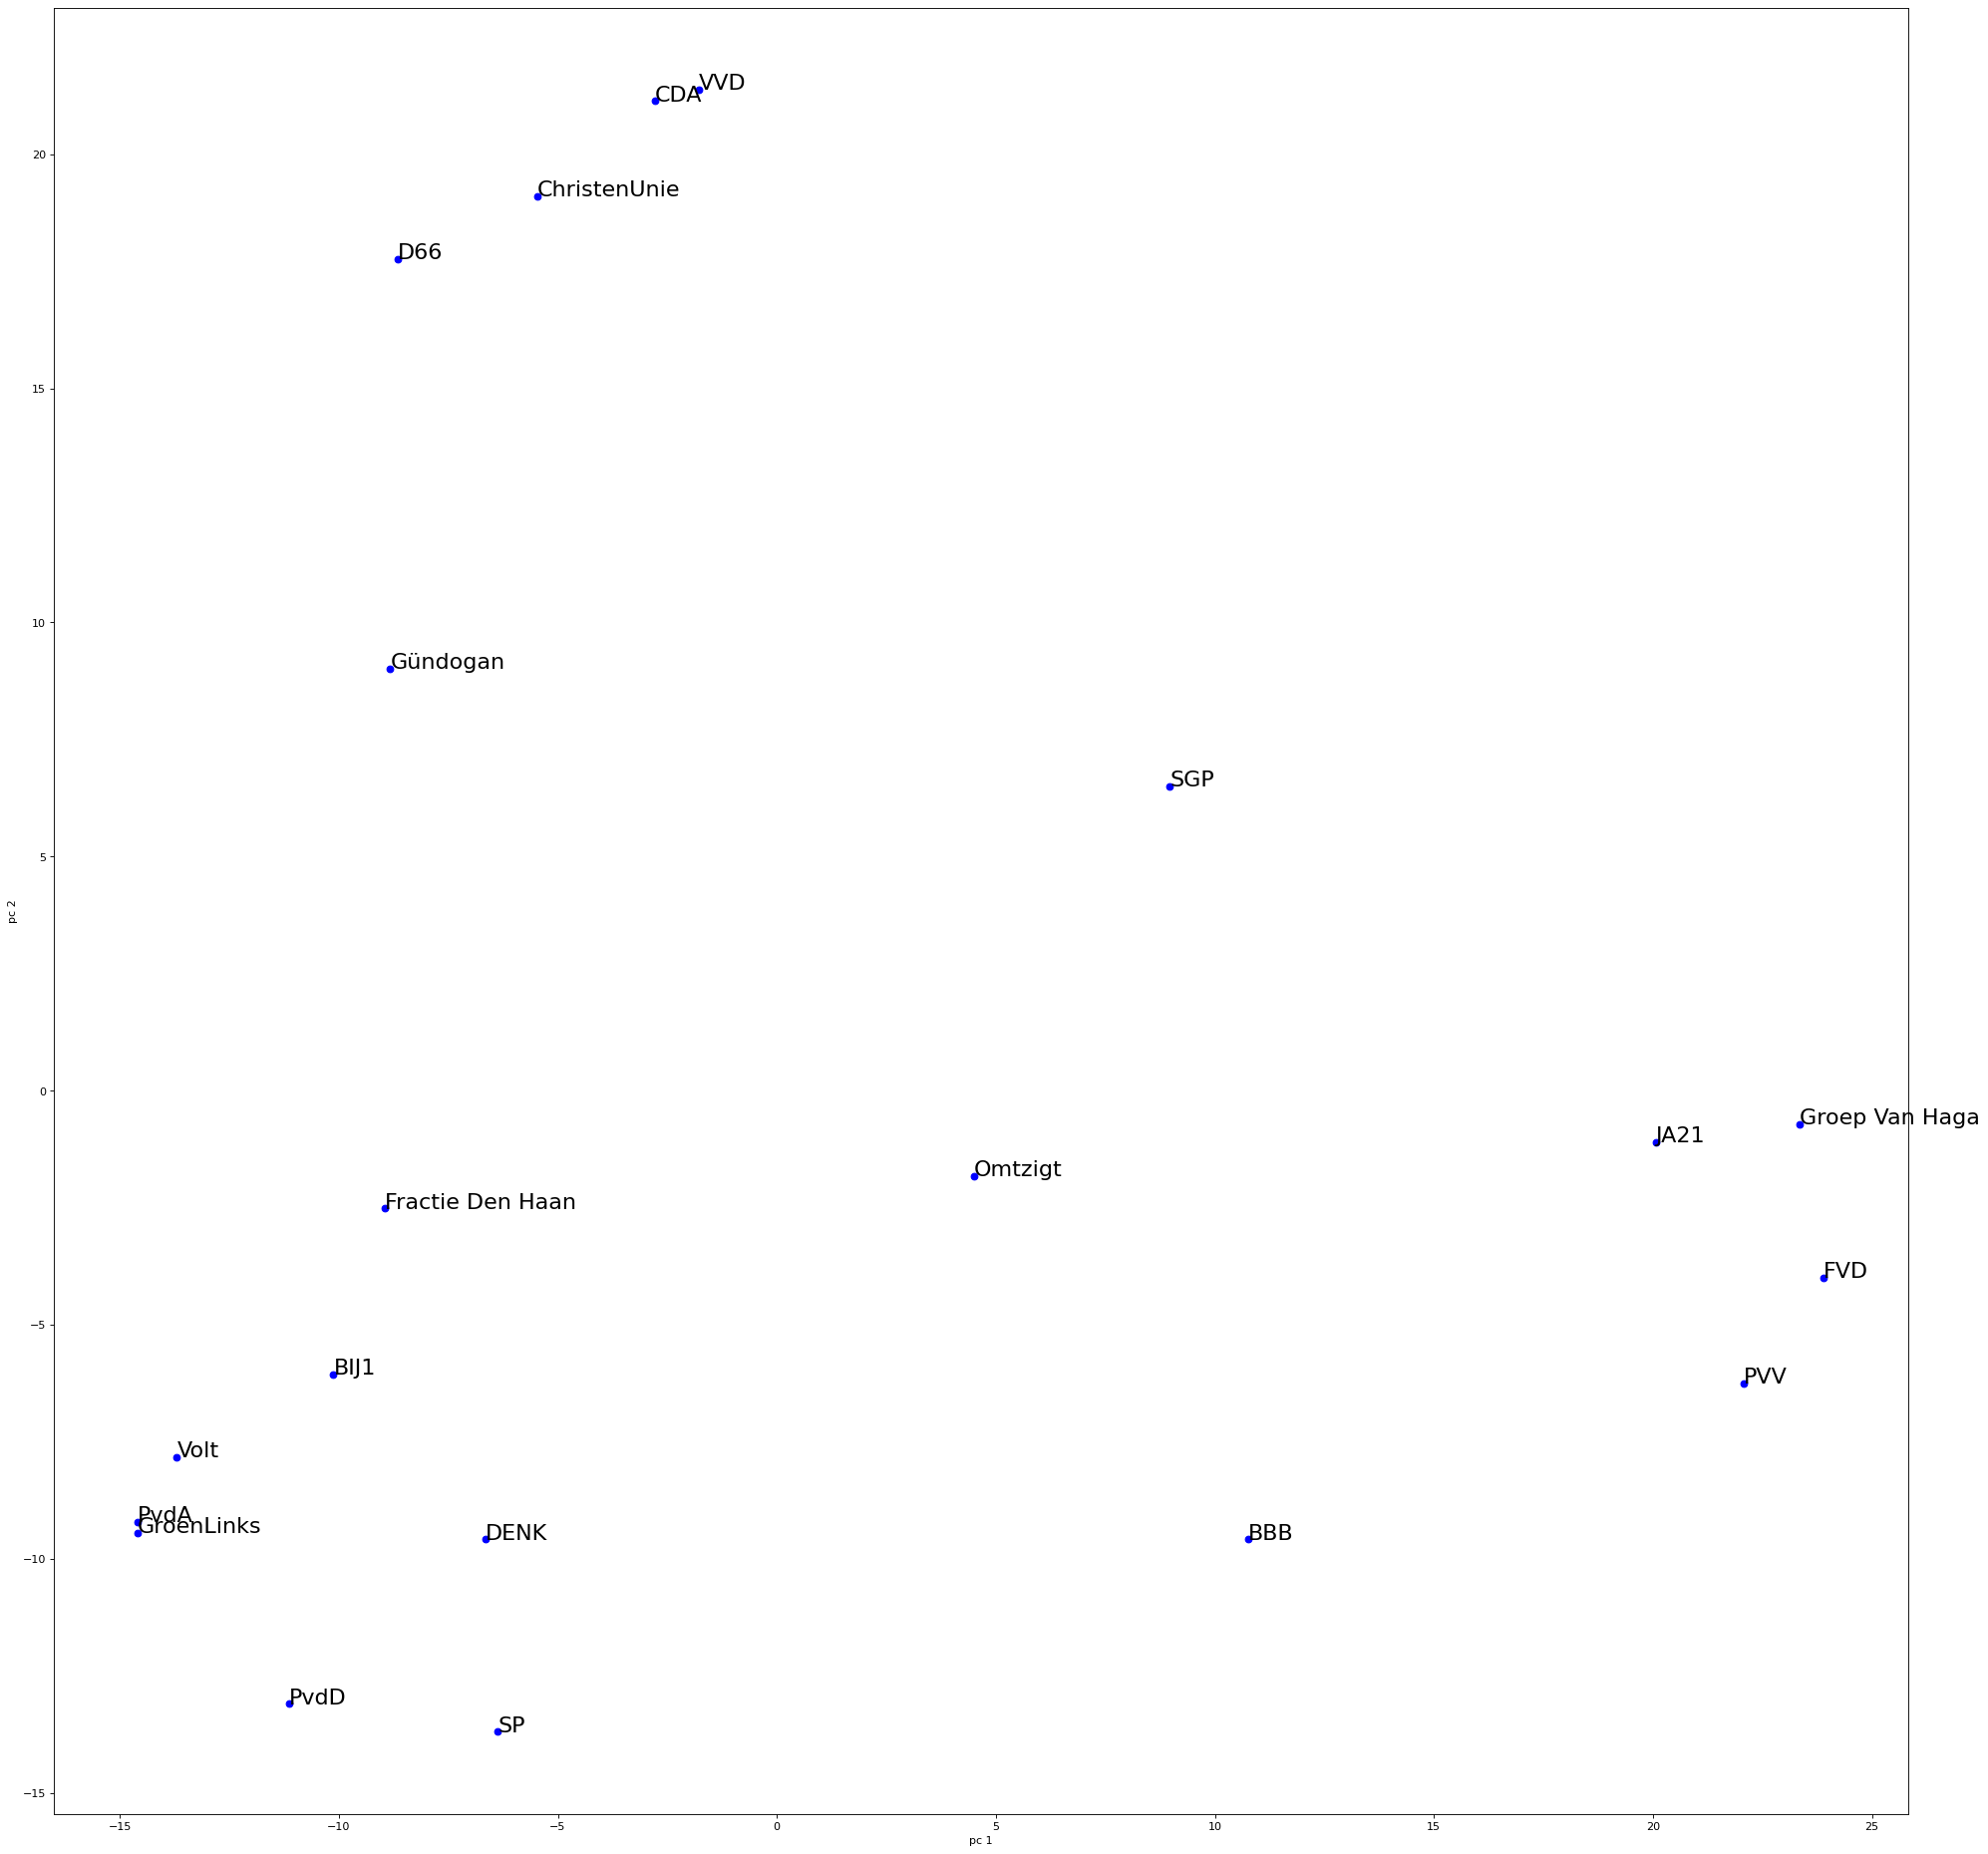

In [71]:
xyzn = list(zip(components[:,0], components[:,1]))#, pca_result[:,2]))
fig = figure(figsize=(30, 30), dpi=80)
ax = fig.add_subplot()

for i in range(len(xyzn)): #plot each point + it's index as text above
    ax.scatter(xyzn[i][0],xyzn[i][1],color='b') 
    ax.text(xyzn[i][0],xyzn[i][1], s = str(parties[i]), size=20, zorder=1, color='k') 

ax.set_xlabel('pc 1')
ax.set_ylabel('pc 2')
#ax.set_zlabel('pc 3')
pyplot.show()



IndexError: list index out of range

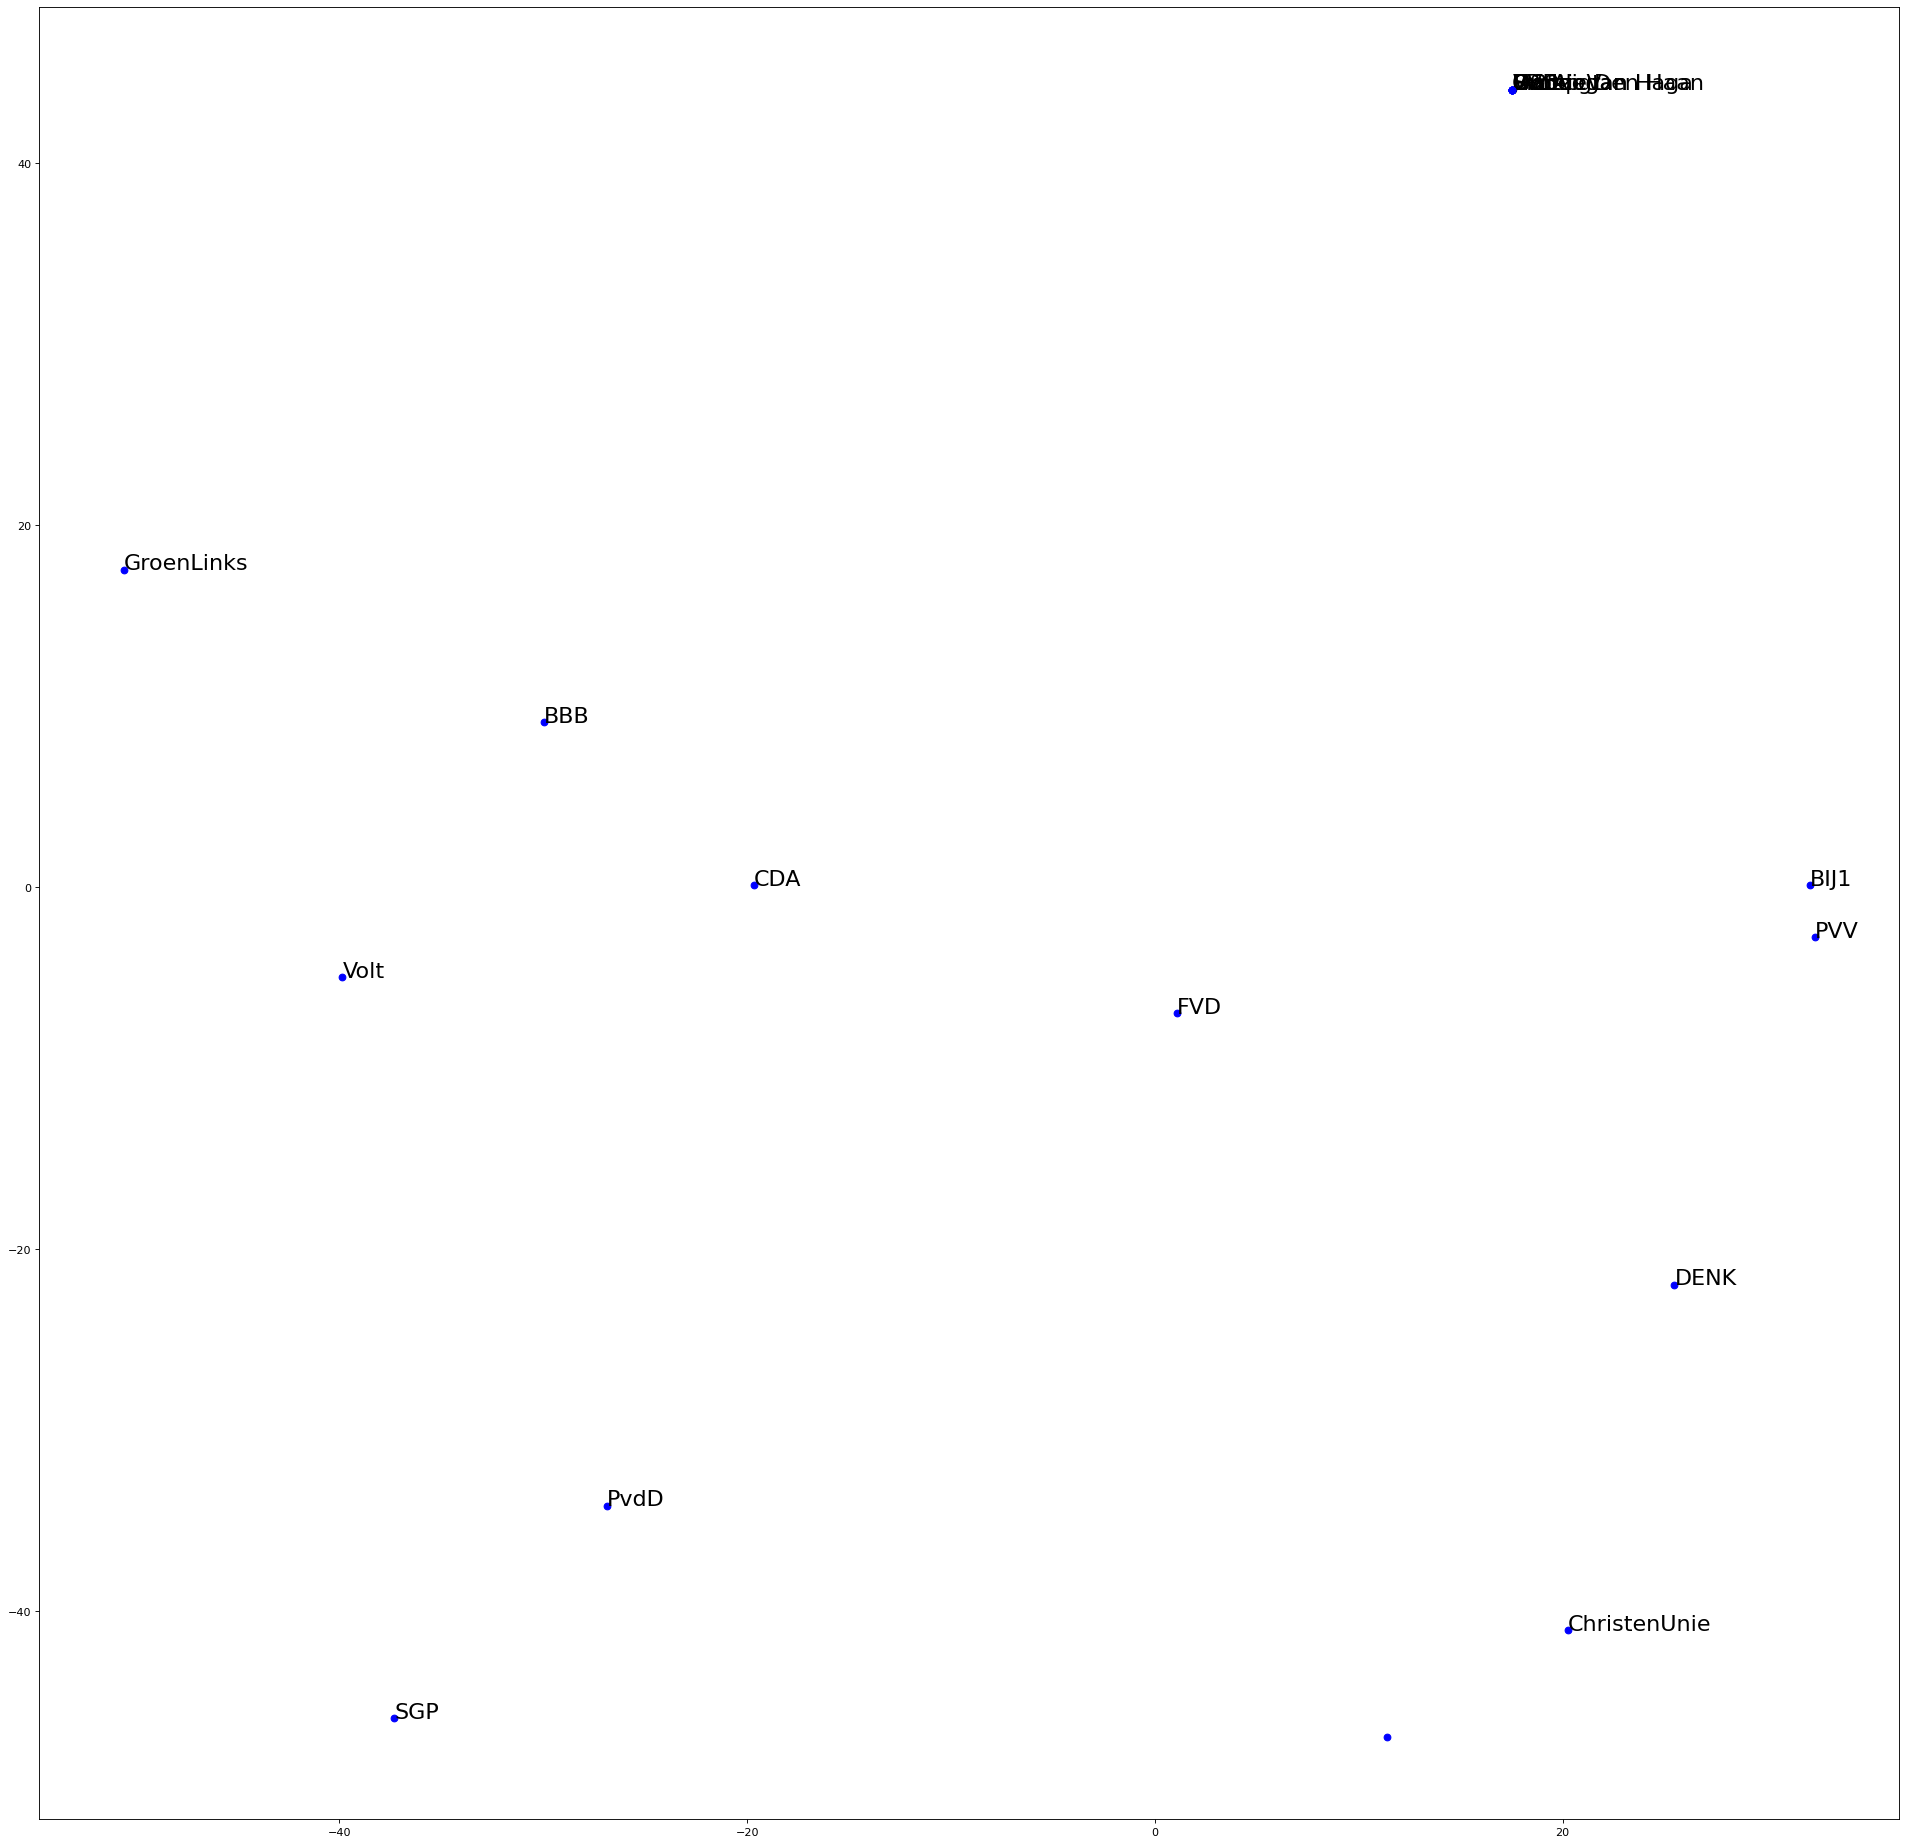

In [63]:
components = TSNE(n_components=2, learning_rate="auto", init="random").fit_transform(df[parties].T)
xyzn = list(zip(components[:,0], components[:,1]))#, pca_result[:,2]))
fig = figure(figsize=(30, 30), dpi=80)
ax = fig.add_subplot()

for i in range(len(xyzn)): #plot each point + it's index as text above
    ax.scatter(xyzn[i][0],xyzn[i][1],color='b') 
    ax.text(xyzn[i][0],xyzn[i][1], s = str(parties[i]), size=20, zorder=1, color='k') 

ax.set_xlabel('pc 1')
ax.set_ylabel('pc 2')
#ax.set_zlabel('pc 3')
pyplot.show()